# Data Description
Hello everyone!

I've started to collecting and sorting a dataset about volleyball players in Volleyball National League in 2023.

the recourse I've used is volleyballworld.com

In each factor, I have used the average of the player during a game, which was the author of errors, points and percentage of positive performance of that player in each section.

Here are some information about the Dataset:

Position Feature represent the real position of each player

OH : outside hitter

OP : Opposite hitter

MB : Middle blocker

S : Setter

L : Libero

Attack : A player's overall average during each game in the offense factor

Block : A player's overall average during each game in the defense factor.

Defense on the net includes direct points, errors and touching the ball without changing points.

Serve : Except for the libero player, the rest of the players serve during each turn to start the game. Each player's service average during the match is listed here.

Set : The setter is responsible for setting the players. But in special cases, the rest of the players cooperate in this matter, and in the data analysis, we will find out which position the players have the most participation in setting after the setter.

Set feature represent the average of successful sets, errors and attempts for each ball during a rally.

Dig : the average of digs, errors and receptions

Receive : Receive feature also represents the average of successful receptions, errors and attempts per mach.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./VNL2023_Volley_Ball_Data.csv")
df

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH
...,...,...,...,...,...,...,...,...,...,...
126,Graven Leonard,Germany,19,0.00,0.00,0.00,0.00,5.92,1.92,L
127,Balaso Fabio,Italy,28,0.00,0.00,0.00,0.00,10.00,5.00,L
128,Nacsimento Maique Reis,Brazil,26,0.00,0.00,0.00,0.00,5.08,2.46,L
129,Garcia Alvarez Yonder Roman,Cuba,30,0.00,0.00,0.00,0.00,4.25,3.25,L


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB


In [7]:
df.Country.value_counts()

Country
Poland       10
France       10
Iran          9
USA           9
Japan         8
Italy         8
Slovenia      8
Serbia        8
Argentina     8
Germany       8
Brazil        8
China         8
Bulgaria      8
Cuba          7
Nederland     7
Canada        7
Name: count, dtype: int64

In [8]:
df.nunique()

Player      131
Country      16
Age          21
Attack      101
Block        65
Serve        55
Set          23
Dig          99
Receive      64
Position      5
dtype: int64

In [10]:
df.head(5)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [32]:
df.Country.value_counts()

Country
Poland       10
France       10
Iran          9
USA           9
Japan         8
Italy         8
Slovenia      8
Serbia        8
Argentina     8
Germany       8
Brazil        8
China         8
Bulgaria      8
Cuba          7
Nederland     7
Canada        7
Name: count, dtype: int64

In [71]:
country = df.groupby("Country").value_counts().head(30)

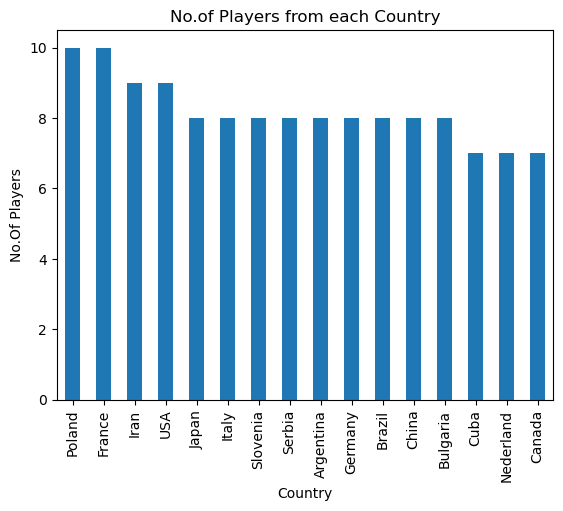

In [72]:
df.Country.value_counts().plot(kind = 'bar')
plt.xlabel('Country')
plt.ylabel('No.Of Players')
plt.title('No.of Players from each Country')
plt.show()

In [59]:
top_15_setpoints = df.groupby('Player')['Set'].sum().sort_values(ascending = False).head(15)

In [60]:
top_15_setpoints

Player
De Cecco Luciano       26.89
Giannelli Simone       25.18
Christenson Micah      21.67
Sekita Masahiro        19.73
Rezende Bruno Mossa    18.38
Seganov Georgi         17.92
Janusz Marcin          17.86
Brizard Antoine        17.33
Ropret Gregor          17.15
Keemink Wessel         17.08
Todorovic Vuk          16.42
Herr Luke              16.00
Tille Johannes         15.33
Taboada Diaz Lyvan     15.25
Wang Hebin             12.50
Name: Set, dtype: float64

In [61]:
df.head(2)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.6,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.0,OP


In [146]:
df.groupby('Player')['Attack'].max().sort_values(ascending = False).head(15)

Player
Ichikawa Yuki                15.80
Abdel-Aziz Nimir             15.33
Faure Theo                   15.25
Herrera Jaime Jesus          15.00
Luburic Drazen               14.33
Nikolov Aleksandar           14.25
Zhang Jingyin                13.50
Urnaut Tine                  12.62
Souza Alen                   12.46
Lopez Castro Miguel Angel    12.33
Romano Yuri                  12.33
Esmaeilnezhad Amin           12.00
Souza Ricardo Lucarelli      11.85
Palonsky Luciano             11.62
Takahashi Ran                11.53
Name: Attack, dtype: float64

In [78]:
df_country = country.reset_index()

In [81]:
df_country.head(10)

,Country,Player,Age,Attack,Block,Serve,Set,Dig,Receive,Position,count
0,Argentina,Danani Santiago,28,0.00,0.00,0.00,0.00,8.69,6.15,L,1
1,Argentina,De Cecco Luciano,35,0.78,0.56,0.44,26.89,6.33,0.00,S,1
2,Argentina,Koukartsev Pablo Sergio,30,6.23,0.46,0.23,0.00,2.00,0.38,OP,1
3,Argentina,Lima Bruno,27,9.15,0.54,0.54,0.00,2.31,0.15,OP,1
4,Argentina,Loser Agustin,26,7.92,4.08,0.92,0.00,2.31,0.69,MB,1
5,Argentina,Palonsky Luciano,24,11.62,1.00,1.46,0.00,5.62,4.38,OH,1
6,Argentina,Vicentin Luciano,23,8.62,1.15,0.46,0.00,5.54,4.31,OH,1
7,Argentina,Zerba Nicolas,24,3.08,0.69,0.23,0.00,1.08,0.23,MB,1
8,Brazil,Honorato Henrique Dantas Nobrega,26,5.92,1.15,0.38,0.00,3.23,3.00,OH,1
9,Brazil,Nacsimento Maique Reis,26,0.00,0.00,0.00,0.00,5.08,2.46,L,1


In [82]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [89]:
df.shape

(131, 10)

In [90]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [92]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [96]:
df.dtypes

Player       object
Country      object
Age           int64
Attack      float64
Block       float64
Serve       float64
Set         float64
Dig         float64
Receive     float64
Position     object
dtype: object

In [100]:
numeric_cols = df.select_dtypes(include = ['int','float']).columns


In [107]:
corr_mat = df[numeric_cols].corr()

In [108]:
corr_mat

,Age,Attack,Block,Serve,Set,Dig,Receive
Age,1.000000,-0.177849,-0.101040,-0.108367,0.177757,0.167141,-0.011067
Attack,-0.177849,1.000000,0.338412,0.768859,-0.430805,-0.098999,0.169892
Block,-0.101040,0.338412,1.000000,0.335954,-0.132019,-0.348347,-0.265206
Serve,-0.108367,0.768859,0.335954,1.000000,-0.154815,-0.052501,0.039642
Set,0.177757,-0.430805,-0.132019,-0.154815,1.000000,0.131659,-0.305869
Dig,0.167141,-0.098999,-0.348347,-0.052501,0.131659,1.000000,0.624733
Receive,-0.011067,0.169892,-0.265206,0.039642,-0.305869,0.624733,1.000000


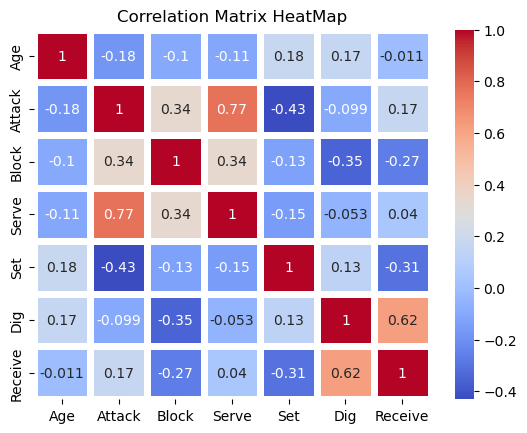

In [110]:
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm', linewidth = 5)
plt.title("Correlation Matrix HeatMap")
plt.show()

In [111]:
position_counts = df['Position'].value_counts()

In [112]:
position_counts

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

In [115]:
country_counts = df['Country'].value_counts()

In [116]:
country_counts

Country
Poland       10
France       10
Iran          9
USA           9
Japan         8
Italy         8
Slovenia      8
Serbia        8
Argentina     8
Germany       8
Brazil        8
China         8
Bulgaria      8
Cuba          7
Nederland     7
Canada        7
Name: count, dtype: int64

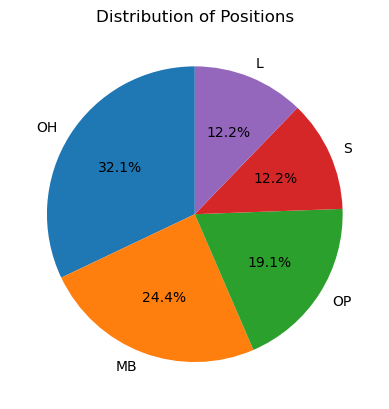

In [124]:
plt.pie(position_counts,labels = position_counts.index,autopct = "%1.1f%%", startangle = 90)
plt.title("Distribution of Positions")
plt.show()

In [130]:
avg_attack_by_country = df.groupby('Country')['Attack'].mean()
avg_attack_by_country.sort_values(ascending = False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

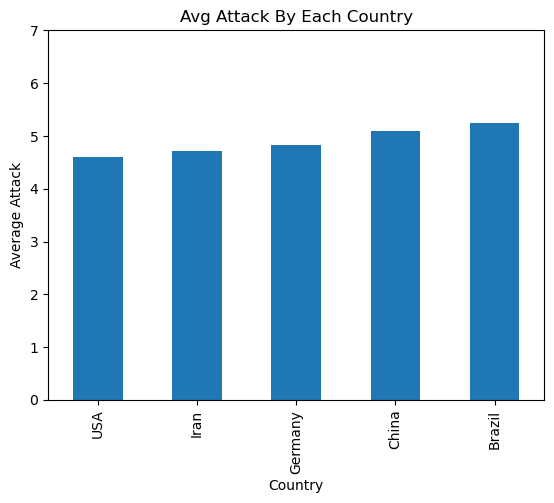

In [134]:
avg_attack_by_country.sort_values(ascending = True).head(5).plot(kind = 'bar')
plt.title('Avg Attack By Each Country')
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.show()

In [137]:
avg_serve_age = df.groupby('Age')['Serve'].mean().sort_values(ascending=False).head(5)
avg_serve_age

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
Name: Serve, dtype: float64

In [150]:
df.groupby(['Country','Player','Position'])['Attack'].max().reset_index().sort_values(ascending = False,by = 'Attack').head(10)

,Country,Player,Position,Attack
81,Japan,Ichikawa Yuki,OH,15.80
89,Nederland,Abdel-Aziz Nimir,OP,15.33
52,France,Faure Theo,OP,15.25
41,Cuba,Herrera Jaime Jesus,OP,15.00
110,Serbia,Luburic Drazen,OP,14.33
21,Bulgaria,Nikolov Aleksandar,OH,14.25
38,China,Zhang Jingyin,OH,13.50
121,Slovenia,Urnaut Tine,OH,12.62
14,Brazil,Souza Alen,OP,12.46
79,Italy,Romano Yuri,OP,12.33


In [147]:
df.head(2)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.6,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.0,OP


In [159]:
df.groupby(['Country','Player','Position'])['Dig'].max().reset_index().sort_values(ascending=False,by='Dig').head(10)

,Country,Player,Position,Dig
53,France,Grebennikov Jenia,L,11.44
73,Italy,Balaso Fabio,L,10.00
115,Slovenia,Kovacic Jani,L,9.85
87,Japan,Yamamoto Tomohiro,L,8.73
0,Argentina,Danani Santiago,L,8.69
105,Poland,Zatorski Pawel,L,7.09
90,Nederland,Andringa Robbert,L,6.92
75,Italy,Giannelli Simone,S,6.64
34,China,Qu Zongshuai,L,6.58
107,Serbia,Kapur Milorad,L,6.50


In [163]:
df.groupby(['Country'])['Dig'].sum().sort_values(ascending = False)

Country
France       38.59
Italy        35.89
Argentina    33.88
Slovenia     33.85
Poland       32.56
Japan        32.38
Serbia       30.64
USA          28.42
Canada       26.50
Brazil       24.61
Iran         24.25
Bulgaria     22.45
China        22.08
Nederland    21.84
Germany      20.92
Cuba         20.26
Name: Dig, dtype: float64

In [165]:
df.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

In [ ]:
df.rename(columns =

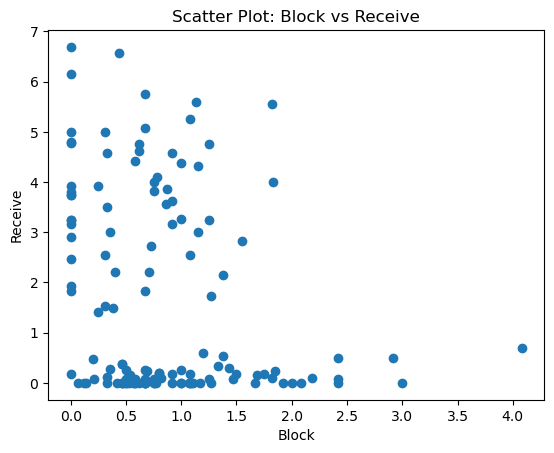

In [166]:
plt.scatter(df['Block'],df['Receive'])
plt.title("Scatter Plot: Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

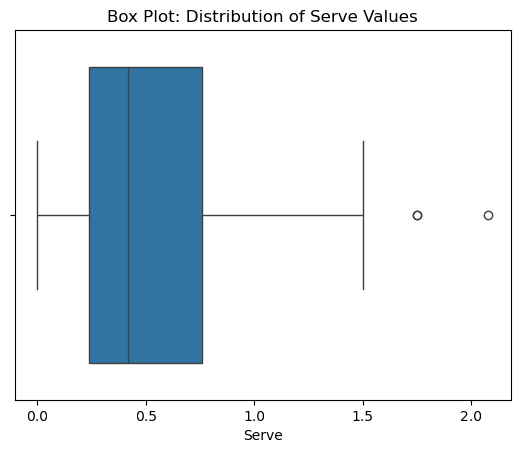

In [6]:
sns.boxplot(x= df['Serve'])
plt.title('Box Plot: Distribution of Serve Values')
plt.xlabel('Serve')
plt.show()

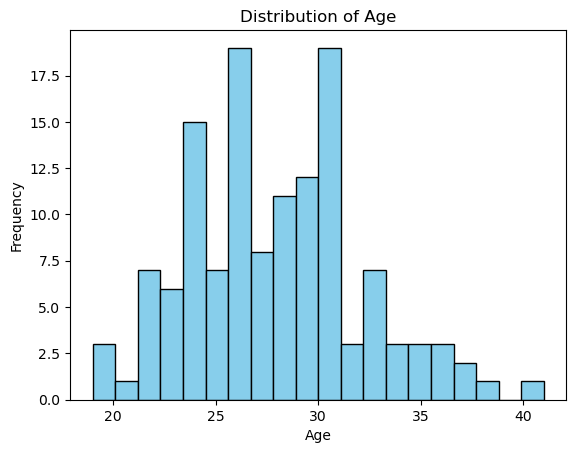

In [14]:
plt.hist(df['Age'], bins= 20, color ='skyblue', edgecolor = 'black')
plt.title('Distribution of Age')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

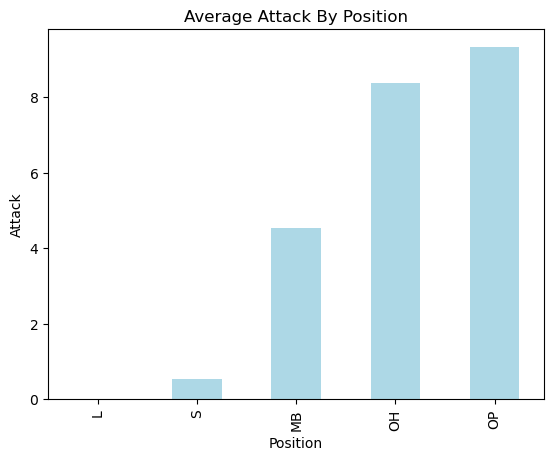

In [21]:
avg_attack_by_position = df.groupby("Position")['Attack'].mean()
avg_attack_by_position.sort_values(ascending= True).plot(kind = 'bar', color = 'lightblue')
plt.title('Average Attack By Position')
plt.xlabel('Position')
plt.ylabel('Attack')
plt.show()

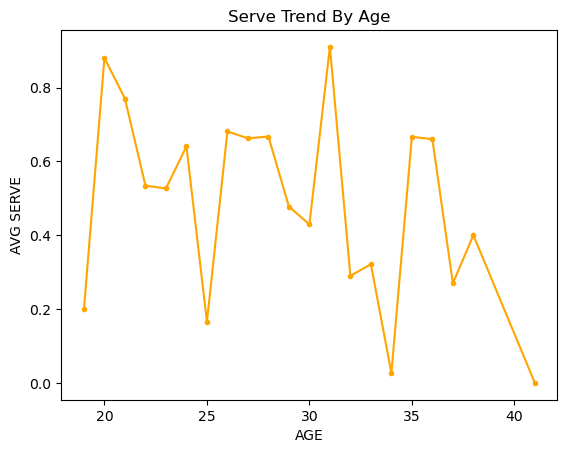

In [29]:
serve_trend_by_age = df.groupby('Age')['Serve'].mean()
serve_trend_by_age.plot(kind = 'line', marker = '.', linestyle ='-', color = 'orange')
plt.title("Serve Trend By Age")
plt.xlabel("AGE")
plt.ylabel("AVG SERVE")
plt.show()


In [50]:
total_attack_block_by_country = df.groupby('Country')[['Attack','Block','Dig']].sum()
total_attack_block_by_country

,Attack,Block,Dig
Country,,,
Argentina,47.40,8.48,33.88
Brazil,42.00,6.30,24.61
Bulgaria,42.26,5.96,22.45
Canada,37.84,5.08,26.50
China,40.75,5.66,22.08
Cuba,44.41,6.76,20.26
France,66.70,9.08,38.59
Germany,38.67,5.04,20.92
Iran,42.37,8.39,24.25


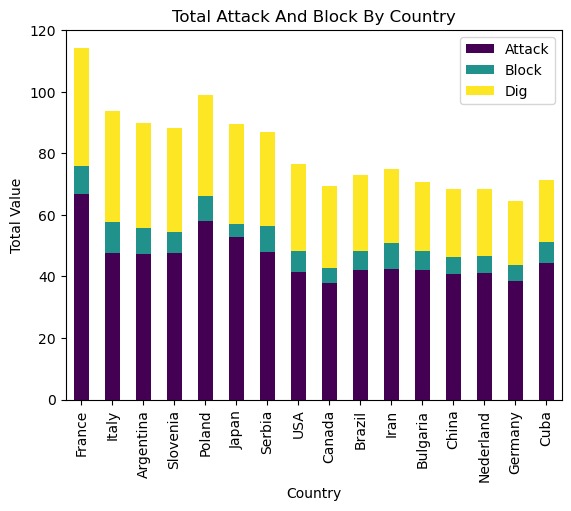

In [52]:
total_attack_block_by_country.sort_values(ascending = False, by= 'Dig').plot(kind = 'bar', stacked = True, colormap= 'viridis')
plt.title('Total Attack And Block By Country')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.show()